# Cell Types Project
*Comparing gene expression profiles and electrophysiological features of excitatory and inhibitory neurons.*

## Team Member Names & Contributions
Group 13  
Joanna A16980082  
Lorin A16982359

*Fill in your 3-4 sentence abstract here*

## Research Question

We aim to compare inhibitory and excitatory neurons through several modalities. Namely, we analyze differences in gene expression profiles and eletrophysiological features. 
For gene expression data we focus on cells highly expressing GABA and Glutamate as the framework for inhibitory and excitatory cells. Here we: 1) Compare the brain regions where these two neurotransmitters are expressed most through finding cells which express related genes; 2) Find what other genes are most expressed in the cells connected to GABA/Glutamate to establish the differences in gene expression for inhibitory and excitatory cells.

# Background and Prior Work

Depression is a complex neurological disorder that significantly impacts mood, cognition, and behavior. The condition is often associated with disruptions in neurotransmitter systems, particularly the balance between excitatory (glutamate) and inhibitory (GABA) signaling. Investigating the molecular and electrophysiological profiles of neurons and glial cells can provide insights into the mechanisms underlying depression and identify potential therapeutic targets.

Glutamate and GABA are the brain’s primary excitatory and inhibitory neurotransmitters, respectively. The glutamate-GABA balance is essential for maintaining proper neural network activity. In depression, dysregulation of glutamate receptors, such as NMDA and AMPA receptors, can lead to excitotoxicity and impair synaptic plasticity. Reduced GABAergic signaling has been linked to increased stress responses and impaired inhibitory control in neural circuits.

These disruptions are particularly evident in brain regions such as the hippocampus and prefrontal cortex, which are critical for emotion regulation and cognitive function.

Electrophysiological properties, such as membrane potential and firing rates, provide functional insights into the activity of neurons in depressive states. By analyzing these markers in conjunction with gene expression data, we can identify potential molecular pathways that mediate depression-related changes in brain function.

Datasets

Brain Region-Specific Gene Expression Data:\
• Source: brainarea_vs_genes_exp_w_reannotations.tsv\
• Description: This dataset contains gene expression profiles across multiple brain regions, allowing for the identification of region-specific patterns of glutamate and GABA pathway-related genes.

Electrophysiology Data:\
• Source: Allen Institute Cell Types Data\
• Description: Provides electrophysiological properties of human brain cells, including firing rates, membrane potentials, and upstroke-to-downstroke ratios. These features can be linked to functional changes in excitatory and inhibitory signaling.

Prior studies have shown that increased glutamate activity and decreased GABAergic signaling are hallmarks of depression. For example, ketamine’s antidepressant effects are thought to involve modulation of NMDA receptor activity. In addition, neuroinflammation has been implicated in the dysregulation of glutamate and GABA systems, with cytokines like IL-6 and TNF-alpha affecting synaptic transmission.

### References (include links):
(1)Hu, YT., Tan, ZL., Hirjak, D. et al. Brain-wide changes in excitation-inhibition balance of major depressive disorder: a systematic review of topographic patterns of GABA- and glutamatergic alterations. Mol Psychiatry 28, 3257–3266 (2023). https://doi.org/10.1038/s41380-023-02193-x\

(2)Marc S. Lener, et al. “Glutamate and Gamma-Aminobutyric Acid Systems in the Pathophysiology of Major Depression and Antidepressant Response to Ketamine.” Biological Psychiatry, Elsevier, 12 May 2016. https://doi.org/10.1016/j.biopsych.2016.05.005

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [16]:
# Python packages that need to be imported

import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# For comparing gene expression profiles we use the the brainarea_vs_genes_exp_w_reannotations.tsv 
# data file found in homework a1-ConditionallyExpressed.

gene_df = pd.read_csv('brainarea_vs_genes_exp_w_reannotations.tsv', delimiter = '\t')
gene_df = gene_df.set_index('gene_symbol')
gene_df.head()

,CA1 field,CA2 field,CA3 field,CA4 field,"Crus I, lateral hemisphere","Crus I, paravermis","Crus II, lateral hemisphere","Crus II, paravermis",Edinger-Westphal nucleus,Heschl's gyrus,...,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect",transverse gyri,trochlear nucleus,tuberomammillary nucleus,ventral tegmental area,ventromedial hypothalamic nucleus,vestibular nuclei,zona incerta
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.856487,-1.773695,-0.678679,-0.986914,0.826986,0.948039,0.935427,1.120774,-1.018554,0.170282,...,0.277830,0.514923,0.733368,-0.104286,-0.910245,1.039610,-0.155167,-0.444398,-0.901361,-0.236790
A1BG-AS1,0.257664,-1.373085,-0.619923,-0.636275,0.362799,0.353296,0.422766,0.346853,-0.812015,0.903358,...,1.074116,0.821031,1.219272,0.901213,-1.522431,0.598719,-1.709745,-0.054156,-1.695843,-1.155961
A1CF,-0.089614,-0.546903,0.282914,-0.528926,0.507916,0.577696,0.647671,0.306824,0.089958,0.149820,...,-0.030265,-0.187367,-0.428358,-0.465863,-0.136936,1.229487,-0.110680,-0.118175,-0.139776,0.123829
A2M,0.552415,-0.635485,-0.954995,-0.259745,-1.687391,-1.756847,-1.640242,-1.733110,-0.091695,0.003428,...,-0.058505,0.207109,-0.161808,0.183630,0.948098,-0.977692,0.911896,-0.499357,1.469386,0.557998
A2ML1,0.758031,1.549857,1.262225,1.338780,-0.289888,-0.407026,-0.358798,-0.589988,0.944684,-0.466327,...,-0.472908,-0.598317,-0.247797,-0.282673,1.396365,0.945043,0.158202,0.572771,0.073088,-0.886780


In [18]:
# For electrophysiology data we use the Allen Institute Cell Types data.

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_df = pd.DataFrame(human_cells)
human_df = human_df.set_index('id')

ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
human_ephys_df = human_df.join(ephys_features)
human_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


## Data Wrangling

We first conduct gene expression analysis, where we isolate cells which express GABA and Glutamate-related genes the most. GABA being the most prominent inhibitory neurotransmitter and Glutamate the most common excitatory neurotransmitter are good markers for inhibitory/excitatory cells. We successfully isolate related genes, mainly coding for the receptors of these neurotransmitters. Thus, we use cells expressing these related genes as proxies for inhibitory and excitatory cells. 

We take two approaches to comparing inhibitory and excitatory cells using gene expression profiles. Firstly, we determine the brain regions where the GABA/Glutamate-related genes are expressed the most and compare the physiological viability of this. Secondly, we find genes that are expressed most within the excitatory and inhibitory cells. This gives us insight into the gene expression profile differences between excitatory and inhibitory cells.

As for electrophysiological features between inhibitory and excitatory cells, we use the aspiny and spiny marker in the Allen Institute cell types dataset as a proxy. In literature, it is considered that spiny neurons are excitatory, while aspiny neurons are more often inhibitory. We compare resting membrane potential, input resistance and sag between aspiny and spiny neurons to validate the electrophysiological differences between inhibitory and excitatory neurons.

**Gene Expression Analysis - Find genes related to GABA and Glutamate**

In [88]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [89]:
# Create a list of genes included in the dataset
genes = [item for item in gene_df.index]

# Find all GABA-related genes, informed by https://www.genenames.org/data/genegroup/#!/group/562
gaba_genes = []
for item in genes:
    if "GABR" in item or "GABBR" in item:
        gaba_genes.append(item)
print("GABA gene list:")
print(gaba_genes)
print("")

# Find all Glutamate-related genes, informed by https://www.genenames.org/data/genegroup/#!/group/282
glutamate_genes = []
for item in genes:
    if "GRM" in item or "GRI" in item:
        glutamate_genes.append(item)
print("Glutamate gene list:")
print(glutamate_genes)

GABA gene list:
['GABBR1', 'GABBR2', 'GABRA1', 'GABRA2', 'GABRA3', 'GABRA4', 'GABRA5', 'GABRA6', 'GABRB1', 'GABRB2', 'GABRB3', 'GABRD', 'GABRE', 'GABRG1', 'GABRG2', 'GABRG3', 'GABRP', 'GABRQ', 'GABRR1', 'GABRR2', 'GABRR3']

Glutamate gene list:
['GRIA1', 'GRIA2', 'GRIA3', 'GRIA4', 'GRID1', 'GRID2', 'GRID2IP', 'GRIK1', 'GRIK1-AS2', 'GRIK2', 'GRIK3', 'GRIK4', 'GRIK5', 'GRIN1', 'GRIN2A', 'GRIN2B', 'GRIN2C', 'GRIN2D', 'GRIN3A', 'GRIN3B', 'GRINA', 'GRIP1', 'GRIP2', 'GRIPAP1', 'GRM1', 'GRM2', 'GRM3', 'GRM4', 'GRM5', 'GRM6', 'GRM7', 'GRM8', 'PGRMC1', 'PGRMC2', 'RPGRIP1', 'RPGRIP1L']


**Gene Expression Analysis - Find brain regions where GABA and Glutamate genes are expressed the most.**

In [90]:
# We sum the relative gene expression of these genes to find where they are expressed the most.
# Find brain regions where GABA receptors are expressed the most
gaba_gene_df = gene_df.loc[gaba_genes]

# Sum expression levels across all GABA receptor genes for each brain area
gaba_region_expression = gaba_gene_df.sum(axis=0).sort_values(ascending=False)
top_gaba_regions = gaba_region_expression.head(10).index

# Display the top 10 brain areas with highest GABA receptor expression
print("Top Brain Regions with Highest GABA Receptor Gene Expression:")
print(gaba_region_expression.head(10))
print("")

# Find brain regions where Glutamate receptors are expressed the most
glutamate_gene_df = gene_df.loc[glutamate_genes]

# Sum expression levels across all GABA receptor genes for each brain area
glutamate_region_expression = glutamate_gene_df.sum(axis=0).sort_values(ascending=False)
top_glutamate_regions = glutamate_region_expression.head(10).index

# Display the top 10 brain areas with highest GABA receptor expression
print("Top Brain Regions with Highest Glutamate Receptor Gene Expression:")
print(glutamate_region_expression.head(10))

Top Brain Regions with Highest GABA Receptor Gene Expression:
cortico-medial group                 13.904768
ventromedial hypothalamic nucleus    12.649852
frontal pole, medial aspect          11.393687
preoptic region                      11.343850
basomedial nucleus                   11.219342
piriform cortex                      10.642210
CA2 field                             9.945500
dentate gyrus                         9.773178
central nucleus                       9.608634
subiculum                             8.666789
dtype: float64

Top Brain Regions with Highest Glutamate Receptor Gene Expression:
frontal pole, medial aspect                                     16.366552
dentate gyrus                                                   16.012610
CA2 field                                                       15.687292
subiculum                                                       15.522064
frontal pole, inferior aspect                                   13.716218
CA4 field      

**Gene Expression Analysis - Find other most expressed genes in the cells that express GABA/Glutamate- related genes most.**

In [93]:
# Find the cells with the highest GABA-related gene expression
gaba_expression_df = gene_df.loc[GABA_genes]
gaba_cell_expression = gaba_expression_df.sum(axis=0)

# Get the top 10% of cells with the highest GABA expression
top_gaba_cells = gaba_cell_expression[gaba_cell_expression > gaba_cell_expression.quantile(0.9)].index

# Find the most expressed genes in these top GABA-expressing cells
top_gaba_cell_df = gene_df[top_gaba_cells]
top_gaba_gene_expression = top_gaba_cell_df.sum(axis=1).sort_values(ascending=False)

# Display the top 10 most expressed genes in these cells
print("Top Genes Most Expressed in the GABA-Expressing Cells:")
print(top_gaba_gene_expression.head(10))
print("")

# Find the cells with the highest Glutamate-related gene expression
glutamate_expression_df = gene_df.loc[glutamate_genes]
glutamate_cell_expression = glutamate_expression_df.sum(axis=0)

# Get the top 10% of cells with the highest Glutamate expression
top_glutamate_cells = glutamate_cell_expression[glutamate_cell_expression > glutamate_cell_expression.quantile(0.9)].index

# Find the most expressed genes in these top Glutamate-expressing cells
top_glutamate_cell_df = gene_df[top_glutamate_cells]
top_glutamate_gene_expression = top_glutamate_cell_df.sum(axis=1).sort_values(ascending=False)

# Display the top 10 most expressed genes in these cells
print("Top Genes Most Expressed in the Glutamate-Expressing Cells:")
print(top_glutamate_gene_expression.head(10))

Top Genes Most Expressed in the GABA-Expressing Cells:
gene_symbol
TRPC4        30.835731
ACVR2A       30.805561
TDRD9        30.037315
ZNF667       29.442628
LPPR2        28.404406
LINC00158    28.145336
SYNGAP1      27.794682
RAP2B        27.730145
PPP4R4       27.669746
SUSD4        27.415054
dtype: float64

Top Genes Most Expressed in the Glutamate-Expressing Cells:
gene_symbol
SLC16A2      30.888883
NEURL1B      29.080687
PRKCG        28.001237
ARHGAP28     27.811188
ACVR2A       27.617610
TNFAIP8L3    27.448417
PCDHGC5      27.397415
TENM3        27.110805
PGA3         27.077198
PGA4         27.077198
dtype: float64


**Electrophysiological feature analysis - Split spiny and aspiny neuron data with features of interest: resting membrane potential, input resistance and sag.**

In [96]:
# For this dataset we use spiny neurons as a proxy for excitatory cells while aspiny neurons are used as inhibitory cells.
# Split the data by dendrite type
spiny_neurons = human_ephys_df[human_ephys_df['dendrite_type'] == 'spiny']
aspiny_neurons = human_ephys_df[human_ephys_df['dendrite_type'] == 'aspiny']

# We choose to compare resting membrane potential, input resistance and sag
features = ['vrest', 'input_resistance_mohm', 'sag']

# Create dictionaries for each feature's data for spiny and aspiny neurons
spiny_data = {}
aspiny_data = {}

for feature in features:
    spiny_data[feature] = human_ephys_df[human_ephys_df['dendrite_type'] == 'spiny'][feature]
    aspiny_data[feature] = human_ephys_df[human_ephys_df['dendrite_type'] == 'aspiny'][feature]

## Data Analysis & Results

...

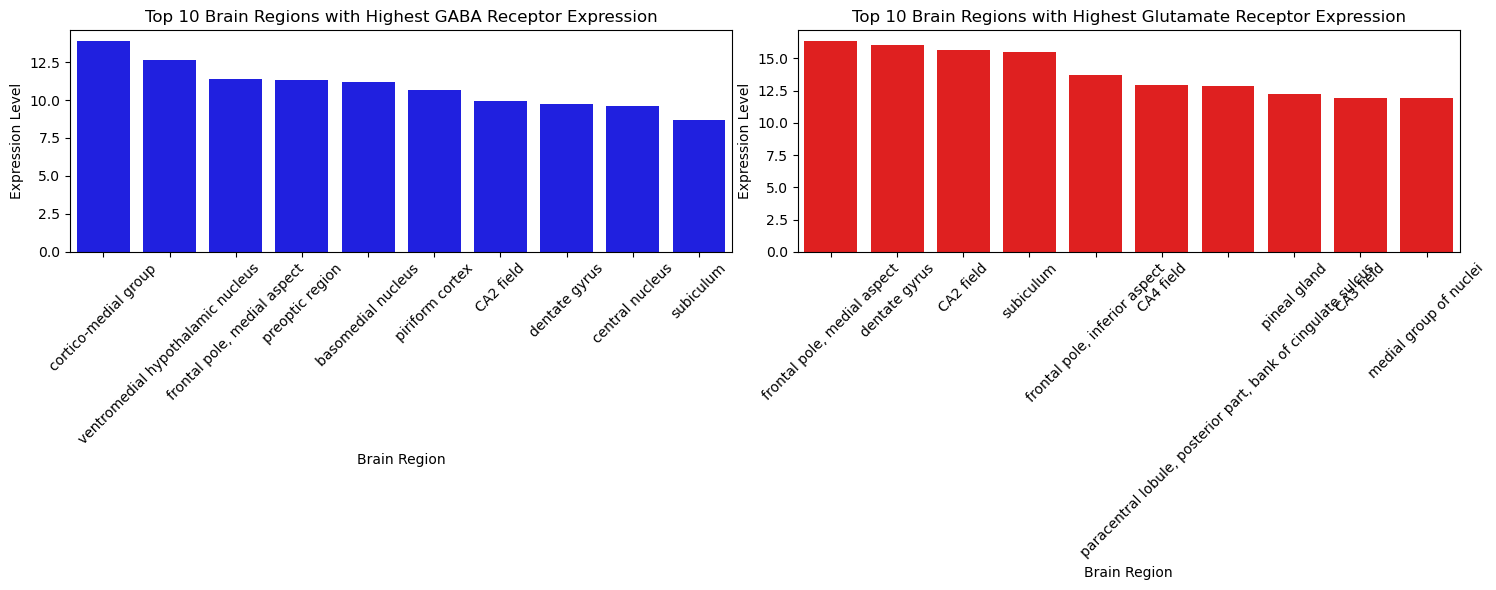

In [62]:
## Plot brain regions where GABA and Glutamate-related genes are expressed most
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 brain regions with highest GABA receptor gene expression
sns.barplot(x=gaba_region_expression.head(10).index, y=gaba_region_expression.head(10).values, color='blue', ax=axes[0])
axes[0].set_title("Top 10 Brain Regions with Highest GABA Receptor Expression")
axes[0].set_xlabel("Brain Region")
axes[0].set_ylabel("Expression Level")
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 brain regions with highest Glutamate receptor gene expression
sns.barplot(x=glutamate_region_expression.head(10).index, y=glutamate_region_expression.head(10).values, color='red', ax=axes[1])
axes[1].set_title("Top 10 Brain Regions with Highest Glutamate Receptor Expression")
axes[1].set_xlabel("Brain Region")
axes[1].set_ylabel("Expression Level")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Include cells that describe the steps in your data analysis.

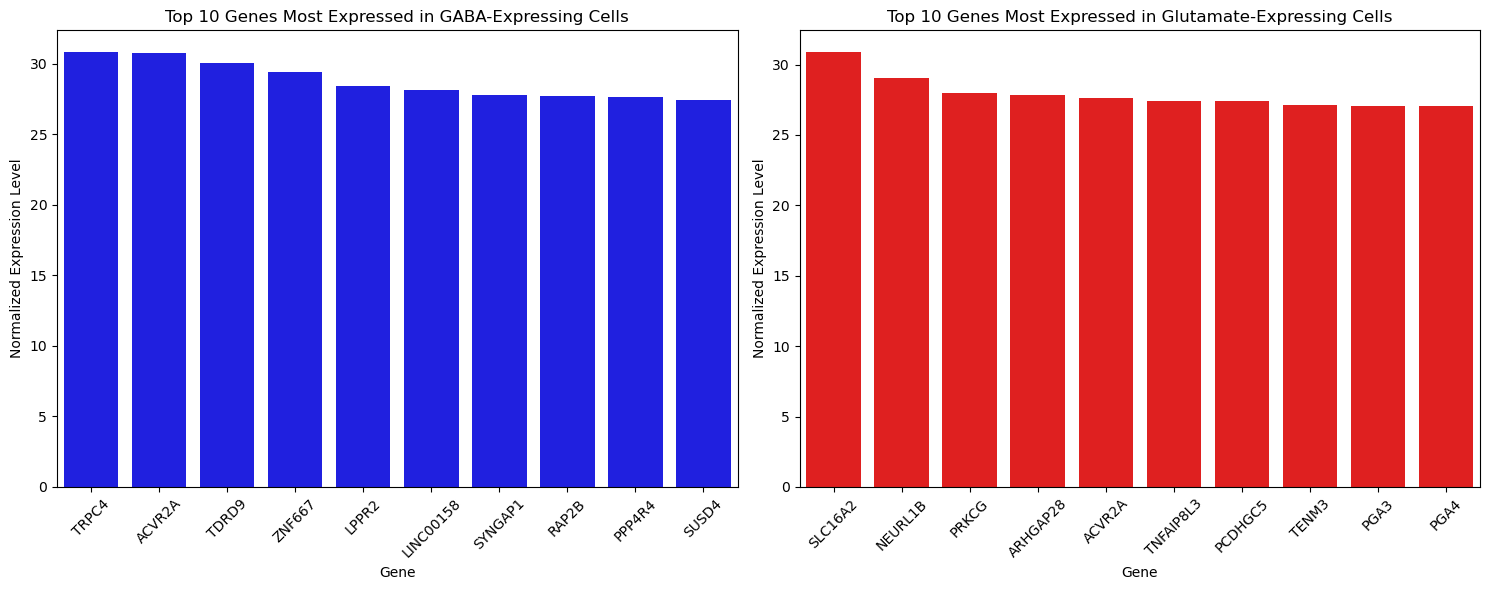

In [63]:
## Plot most expressed genes in the cells that express GABA and Glutamate most
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 most expressed genes in the GABA-related cells
top_gaba_gene_expression_top_10 = top_gaba_gene_expression.head(10)
sns.barplot(x=top_gaba_gene_expression_top_10.index, y=top_gaba_gene_expression_top_10.values, color='blue', ax=axes[0])
axes[0].set_title("Top 10 Genes Most Expressed in GABA-Expressing Cells")
axes[0].set_xlabel("Gene")
axes[0].set_ylabel("Normalized Expression Level")
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 most expressed genes in the Glutamate-realted cells
top_glutamate_gene_expression_top_10 = top_glutamate_gene_expression.head(10)
sns.barplot(x=top_glutamate_gene_expression_top_10.index, y=top_glutamate_gene_expression_top_10.values, color='red', ax=axes[1])
axes[1].set_title("Top 10 Genes Most Expressed in Glutamate-Expressing Cells")
axes[1].set_xlabel("Gene")
axes[1].set_ylabel("Normalized Expression Level")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [84]:
## Perform Mann-Whitney U tests for each feature to determine statistical significance between aspiny and spiny cells.
test_results = {}

for feature in features:
    spiny_values = spiny_data[feature]
    aspiny_values = aspiny_data[feature]
    u_stat, p_val = stats.mannwhitneyu(spiny_values, aspiny_values)
    test_results[feature] = {'U-statistic': u_stat, 'p-value': p_val}

# Display the test results
for feature, result in test_results.items():
    print(f"Feature: {feature}")
    print(f"  U-statistic: {result['U-statistic']}")
    print(f"  p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print("  Result is statistically significant!")
    else:
        print("  Result is not statistically significant.")
    print("")


Feature: vrest
  U-statistic: 9170.0
  p-value: 0.00013793086507725568
  Result is statistically significant!

Feature: input_resistance_mohm
  U-statistic: 3912.0
  p-value: 1.6720249665943428e-21
  Result is statistically significant!

Feature: sag
  U-statistic: 13743.0
  p-value: 0.24819535713115315
  Result is not statistically significant.



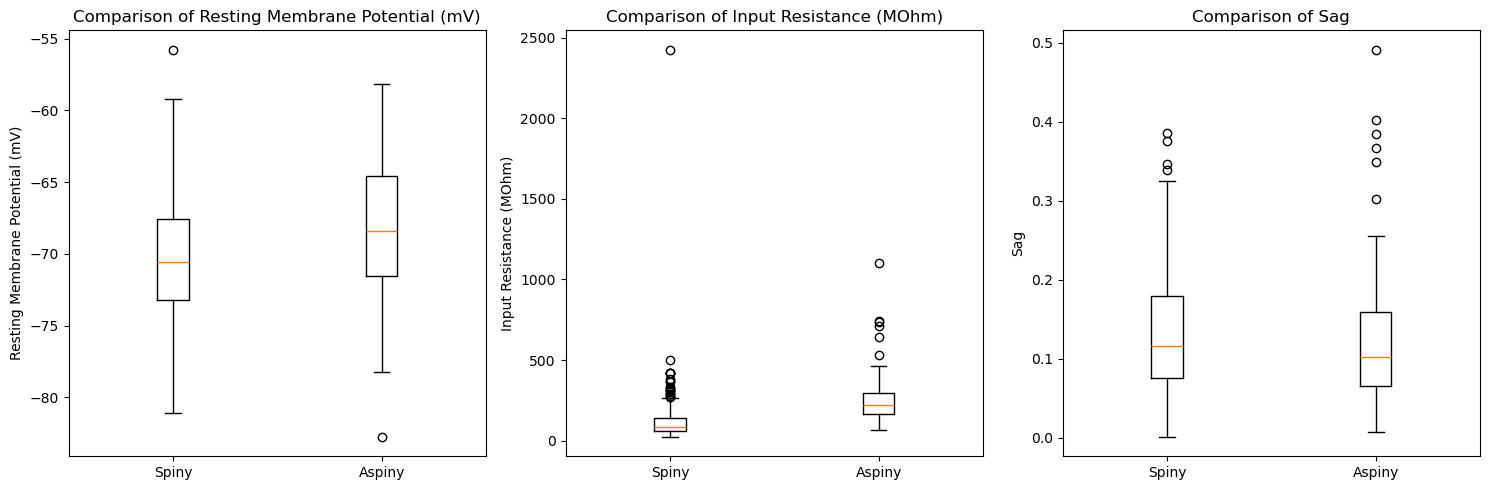

In [97]:
## Plot electrophysiological feature comparison for spiny and aspiny cells on boxplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

labels = ['Resting Membrane Potential (mV)', 'Input Resistance (MOhm)', 'Sag']
for i, feature in enumerate(features):
    data = [spiny_data[feature], aspiny_data[feature]]  # Prepare data for boxplot
    ax[i].boxplot(data)
    ax[i].set_xticklabels(['Spiny', 'Aspiny'])
    ax[i].set_ylabel(labels[i])
    ax[i].set_title(f'Comparison of {labels[i]}')

plt.tight_layout()
plt.show()


## Conclusion & Discussion

Our analysis provides compelling insights into the molecular and electrophysiological characteristics of inhibitory (GABAergic) and excitatory (glutamatergic) neurons, with implications for understanding the functional specialization of brain regions. By examining gene expression profiles, electrophysiological features, and their interplay, we identified key distinctions that shed light on how these cell types contribute to neural circuit function and potentially to depression-related phenotypes.

**Differential Gene Expression Across Brain Regions**

Our analysis revealed significant variation in the expression of GABAergic and glutamatergic genes across brain regions. These findings align with known functional specializations of these regions, supporting the hypothesis that gene expression reflects region-specific roles in inhibitory and excitatory signaling.

GABA-Expressing Genes\
• Ventromedial Hypothalamic Nucleus (VMH): The VMH exhibited high expression of GABA-related genes such as GAD1 and GAD2, which are responsible for GABA synthesis. This aligns with the VMH’s established role in regulating stress responses and energy homeostasis, where inhibitory control is crucial for suppressing overactivity in stress-related pathways.\
• Frontal Pole (Medial Aspect): High GABA expression in the frontal pole suggests the region’s reliance on inhibitory signaling to maintain balance in decision-making and emotional regulation. This region’s involvement in executive functions necessitates precise control over neural excitability, provided by GABAergic neurons.

Glutamate-Expressing Genes\
• Dentate Gyrus (Hippocampus): The dentate gyrus displayed elevated expression of glutamate-related genes, such as GRIN1 (an NMDA receptor subunit). This supports its critical role in synaptic plasticity and neurogenesis, processes fundamental to learning and memory formation.\
• CA2 Field (Hippocampus): The CA2 region showed prominent glutamate-related activity, reflecting its involvement in social memory and synaptic connectivity. Genes like SYNGAP1, essential for synaptic development, were highly expressed, highlighting the region’s excitatory nature.

These region-specific patterns demonstrate the functional specialization of inhibitory and excitatory signaling across different brain areas. They also emphasize how variations in neurotransmitter-related gene expression can contribute to the distinct roles of these regions in cognition, memory, and emotional regulation.

**Most Expressed Genes in GABA and Glutamate Cells**

In addition to regional differences, we identified the top-expressed genes in cells associated with GABAergic and glutamatergic signaling. These genes underscore the molecular basis for the functional differences between inhibitory and excitatory neurons.

GABA-Expressing Cells\
• TRPC4: A calcium-signaling gene, TRPC4 supports the regulation of GABAergic transmission. Calcium signaling is essential for neurotransmitter release, emphasizing its importance in GABA-mediated inhibition.\
• ACVR2A: Activin A receptor type 2A, involved in the TGF-beta signaling pathway, which is essential for synaptic plasticity and neuronal remodeling. ACVR2A likely plays a role in maintaining inhibitory circuit stability and responding to stress-related changes in excitatory input.\
• ZNF667: A transcription factor highly expressed in GABAergic cells, potentially involved in maintaining neuronal identity and regulating inhibitory-specific gene networks.

Glutamate-Expressing Cells\
• SYNGAP1: This gene, a critical regulator of synaptic plasticity, was highly expressed in glutamate-expressing cells. Its role in strengthening synaptic connections aligns with the excitatory functions of glutamatergic neurons in learning and memory.\
• GRIN1: Encoding a subunit of the NMDA receptor, GRIN1 facilitates excitatory neurotransmission. Its high expression highlights its importance in glutamate-mediated synaptic signaling and long-term potentiation.\
• PPP4R4: A gene involved in regulatory pathways affecting excitatory transmission. Its expression may reflect the role of glutamate cells in modulating synaptic strength and excitability.

The distinct expression patterns of these genes in GABAergic and glutamatergic cells underline their specialized roles in inhibitory and excitatory neurotransmission. These findings suggest that molecular mechanisms governing neurotransmitter synthesis, release, and receptor activity are tailored to meet the functional demands of specific cell types.

**Electrophysiological Analysis**

Spiny (excitatory) and aspiny (inhibitory) cells exhibit distinct electrophysiological properties:\
•	Resting Membrane Potential (vrest):\
•	Spiny cells had significantly less hyperpolarized resting membrane potentials compared to aspiny cells (p = 0.0001).\
•	This reflects the higher excitability of excitatory neurons.\
•	Input Resistance (input_resistance_mohm):\
•	Aspiny cells showed significantly higher input resistance (p < 0.00001), consistent with their slower and more regulated firing patterns.\
•	Sag Potential (sag):\
•	No significant difference was observed for sag potential between spiny and aspiny cells.

Interpretation:\
•	The electrophysiological properties align with the roles of spiny (glutamatergic) and aspiny (GABAergic) neurons:\
•	Spiny neurons: Designed for rapid signal transmission and excitatory function.\
•	Aspiny neurons: Optimized for inhibitory control and stability within neural circuits.

**Integration of Gene Expression and Electrophysiology**

The gene expression profiles and electrophysiological characteristics are consistent with the known functional roles of GABAergic and glutamatergic neurons.\
•	TRPC4 and ACVR2A in GABAergic neurons may regulate inhibitory signaling and plasticity to prevent overexcitation.\
•	SYNGAP1 and GRIN1 in Glutamatergic neurons drive synaptic plasticity and excitatory neurotransmission, enabling memory and learning functions.

Together, these findings highlight the functional interplay between molecular and electrophysiological characteristics of inhibitory and excitatory neurons, as well as their specialization across brain regions. This integration offers potential molecular targets for understanding and treating depression. For example, ACVR2A in GABAergic neurons may mediate stress-induced plasticity and inhibitory network adaptation, while GRIN1 and SYNGAP1 in glutamatergic neurons highlight pathways critical for synaptic dysfunction often implicated in depression. These region- and cell-type-specific molecular signatures provide a robust foundation for further studies into the cellular basis of neuropsychiatric disorders. By identifying these distinct patterns, this work advances our understanding of the excitatory-inhibitory balance essential for healthy brain function and offers new perspectives for targeted research into the mechanisms underlying depression and related conditions.